In [1]:
import keras
import keras.backend as K
from keras.models import Sequential, Model
from keras.layers import Input, Dense, Dropout, Activation, \
    Flatten, Lambda, LSTM, RepeatVector, TimeDistributed, Reshape, \
    Conv2D, MaxPooling2D, BatchNormalization, ConvLSTM2D, Bidirectional, Masking
import keras.callbacks as Callbacks 
import numpy as np
import h5py
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.utils.np_utils import to_categorical
from sklearn.preprocessing import scale
from matplotlib import pyplot as plt
from skimage.util import random_noise
from skimage.transform import rotate
from scipy import ndimage
import seaborn as sns
import json
% matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.5
  return f(*args, **kwds)


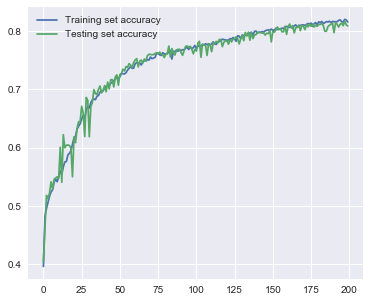

In [17]:
# CNN
with open('saved_history/cnn_ep200.json') as json_data:
    hist_cnn_ep200 = json.load(json_data)
    
plt.figure(figsize=(6,5))
plt.plot(hist_cnn_ep200['acc'], label='Training set accuracy')
plt.plot(hist_cnn_ep200['val_acc'], label='Testing set accuracy')
plt.legend()

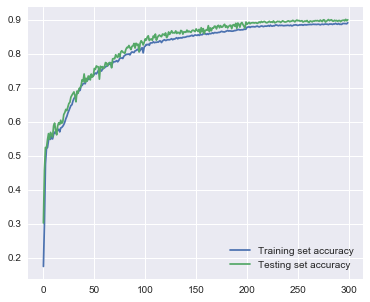

In [19]:
# RCNN Version 1
with open('saved_history/simple_lstm_ep300/history.json', 'r') as f:
    hist_rcnn_ep100 = json.load(f)
with open('saved_history/simple_lstm_ep300/history1.json', 'r') as f:
    hist_rcnn_ep200 = json.load(f)
with open('saved_history/simple_lstm_ep300/history2.json', 'r') as f:
    hist_rcnn_ep300 = json.load(f)
    
plt.figure(figsize=(6,5))
plt.plot(range(len(hist_rcnn_ep100['acc']+hist_rcnn_ep200['acc']+hist_rcnn_ep300['acc'])),\
         hist_rcnn_ep100['acc']+hist_rcnn_ep200['acc']+hist_rcnn_ep300['acc'], label='Training set accuracy')
plt.plot(range(len(hist_rcnn_ep100['acc']+hist_rcnn_ep200['acc']+hist_rcnn_ep300['acc'])), \
         hist_rcnn_ep100['val_acc']+hist_rcnn_ep200['val_acc']+hist_rcnn_ep300['val_acc'], label='Testing set accuracy')
plt.legend()

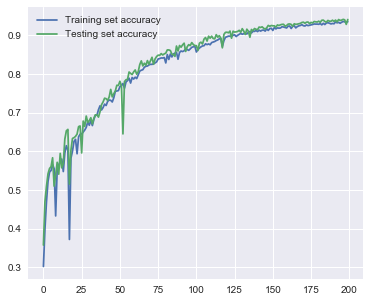

In [16]:
# RCNN Version 2
with open('saved_history/rcnn_bidir_ep200.json', 'r') as f:
    hist_rcnn_bidir_ep200 = json.load(f)
    
plt.figure(figsize=(6,5))
plt.plot(hist_rcnn_bidir_ep200['acc'], label='Training set accuracy')
plt.plot(hist_rcnn_bidir_ep200['val_acc'], label='Testing set accuracy')
plt.legend()

In [2]:
import pickle
best_model_his = pickle.load(open('saved_history/model3_learning_curves.pkl', 'rb'))

In [5]:
best_loss, best_acc, best_val_loss, best_val_acc = best_model_his

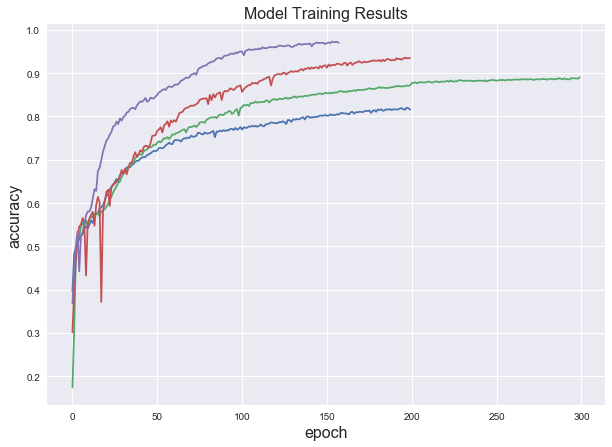

In [16]:
sns.set()
# CNN
with open('saved_history/cnn_ep200.json') as json_data:
    hist_cnn_ep200 = json.load(json_data)
# RCNN Version 1
with open('saved_history/simple_lstm_ep300/history.json', 'r') as f:
    hist_rcnn_ep100 = json.load(f)
with open('saved_history/simple_lstm_ep300/history1.json', 'r') as f:
    hist_rcnn_ep200 = json.load(f)
with open('saved_history/simple_lstm_ep300/history2.json', 'r') as f:
    hist_rcnn_ep300 = json.load(f)
# RCNN Version 2
with open('saved_history/rcnn_bidir_ep200.json', 'r') as f:
    hist_rcnn_bidir_ep200 = json.load(f)
    
    
plt.figure(figsize=(10,7))
plt.plot(hist_cnn_ep200['acc'], label='CNN')

# plt.legend()
    
# plt.figure(figsize=(6,5))
plt.plot(range(len(hist_rcnn_ep100['acc']+hist_rcnn_ep200['acc']+hist_rcnn_ep300['acc'])),\
         hist_rcnn_ep100['acc']+hist_rcnn_ep200['acc']+hist_rcnn_ep300['acc'], label='RCNN unidirectional')

# plt.legend()


    
# plt.figure(figsize=(6,5))
plt.plot(hist_rcnn_bidir_ep200['acc'], label='RCNN bidirectional')


plt.plot(best_acc,label='RCNN bidirectional + Data augmentation')

plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Model Training Results',fontsize=16)
# plt.legend(fontsize=14)
plt.show()

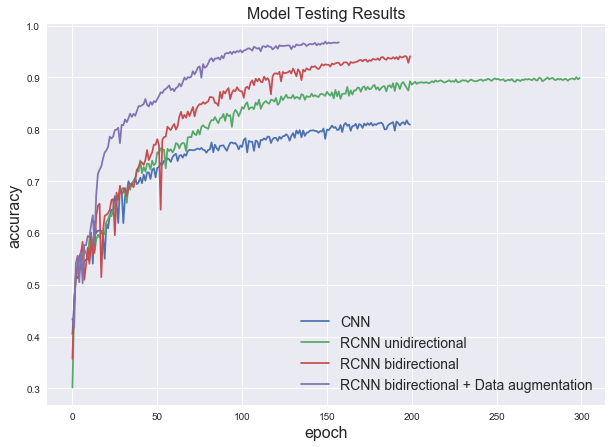

In [17]:
plt.figure(figsize=(10,7))
plt.plot(hist_cnn_ep200['val_acc'], label='CNN')
plt.plot(range(len(hist_rcnn_ep100['acc']+hist_rcnn_ep200['acc']+hist_rcnn_ep300['acc'])), \
         hist_rcnn_ep100['val_acc']+hist_rcnn_ep200['val_acc']+hist_rcnn_ep300['val_acc'], label='RCNN unidirectional')
plt.plot(hist_rcnn_bidir_ep200['val_acc'], label='RCNN bidirectional')
plt.plot(best_val_acc,label='RCNN bidirectional + Data augmentation')
plt.xlabel('epoch',fontsize=16)
plt.ylabel('accuracy',fontsize=16)
plt.title('Model Testing Results',fontsize=16)
plt.legend(fontsize=14)
plt.show()